# **Bank Campaign**

## **Latar Belakang**

Dalam dunia perbankan dan industri keuangan, manajemen nasabah dan pengembangan produk adalah dua aspek kunci yang sangat penting.

Produk keuangan seperti deposito berjangka adalah salah satu alat yang digunakan oleh bank untuk mengumpulkan dana dan meningkatkan keuntungan mereka. 

Dalam data ini, kita ingin mengetahui data historis nasabah: apakah nasabah ini akan melakukan deposito atau tidak jika kita tawarkan campaign melalui telemarketing.


Target: 

0 atau Negative : Tidak Deposit

1 atau Positive : Deposit



## **Masalah**

Salah satu bank swasta di Washington,USA ingin melakukan campaign deposito pada tahun depan, yang dimana campaign ini harus dioptimalkan berdasarkan data historis campaign yang sudah berjalan pada tahun ini .

Salah satu tantangan utama yang dihadapi oleh bank adalah bagaimana memprediksi perilaku nasabah, terutama apakah mereka akan melakukan deposito atau tidak dalam campaign yang di tawarkan melalui telemarketing. 

Kesalahan dalam memprediksi perilaku nasabah dapat mengakibatkan kerugian finansial dan kehilangan peluang bisnis yang berharga. 

Oleh karena itu, untuk mengatasi tantangan ini, penggunaan teknologi machine learning menjadi semakin relevan.

## **Tujuan**

Tujuan dari project ini adalah mengembangkan model machine learning yang dapat membantu bank dalam memprediksi apakah seorang nasabah akan melakukan deposito berjangka atau tidak. 

**Konsukuensi False Positive**: Hilang nya waktu dan resource yang digunakan untuk menawarkan campaign ini.

**Konsukuensi False Negative**: Hilang **`Potential Profit`** serta **`Potential Nasabah`** yang akan melakukan deposit.

Dari konsukensi diatas maka fokus utama dari penelitian ini adalah untuk mereduksi **`False Negative`**, yaitu kasus di mana model memprediksi bahwa seorang nasabah tidak akan melakukan deposito padahal seharusnya ia akan melakukannya. 

Hal ini dilakukan karena salah menebak nasabah yang seharusnya akan melakukan deposito dapat mengakibatkan kerugian bagi bank dalam hal kehilangan potensi pendapatan dari deposito berjangka.

Langkah-langkah yang akan diambil untuk mencapai tujuan ini termasuk:

1. Pengumpulan Data: Mengumpulkan data historis tentang nasabah, termasuk informasi pekerjaan, sejarah transaksi, dan riwayat deposito sebelumnya.

2. Preprocessing Data: Membersihkan dan memproses data untuk menghilangkan nilai yang hilang atau tidak relevan, serta melakukan encoding kategori data.

3. Pembagian Data: Membagi data menjadi dua bagian, yaitu data pelatihan (training data) dan data pengujian (testing data).

4. Pengembangan Model: Mengembangkan model machine learning yang mampu memprediksi apakah seorang nasabah akan melakukan deposito berjangka atau tidak.

5. Evaluasi Model: Mengukur kinerja model, dengan penekanan khusus pada pengurangan False Negative, yang merupakan kesalahan yang ingin dihindari.

6. Implementasi: Mengintegrasikan model ke dalam sistem perbankan untuk membantu dalam pengambilan keputusan dan manajemen nasabah.

Dengan demikian, project ini akan memberikan panduan langkah demi langkah untuk mengembangkan model machine learning yang efektif dalam mengurangi **`False Negative`** dan meningkatkan prediksi nasabah yang berpotensi melakukan deposito berjangka, sehingga bank dapat memaksimalkan potensi pendapatan mereka dan memberikan layanan yang lebih baik kepada nasabahnya.


___

**Stake Holder: `Marketing Team Manager`**

## **Metrics Evaluation**

Dikarenakan kita disini ingin mereduksi nilai **`False Negative`** maka metrics yang digunakan adalah **`F2 SCORE`**

Untuk memahaminya dengan baik, mari kita review terlebih dahulu Precision, Recall, dan F-beta Score.

- **Precision**: Proporsi dari semua positif yang diprediksi oleh model yang benar-benar adalah positif.
$$
\text{Precision} = \frac{TP}{TP + FP}
$$
Dimana $TP$ adalah True Positives dan $FP$ adalah False Positives.

- **Recall (Sensitivity)**: Proporsi dari semua positif yang sebenarnya yang berhasil diidentifikasi oleh model.
$$
\text{Recall} = \frac{TP}{TP + FN}
$$
Dimana $FN$ adalah False Negatives.

- **F-beta Score**: Merupakan rata-rata harmonik dari Precision dan Recall dengan mempertimbangkan bobot: $$\beta$$

rumusnya adalah:
$$
F_{\beta} = (1 + \beta^2) \times \frac{\text{Precision} \times \text{Recall}}{\beta^2 \times \text{Precision} + \text{Recall}}
$$

Dalam formula di atas, $$\beta$$ ditentukan berdasarkan seberapa besar kita ingin memberikan bobot pada Recall dibandingkan dengan Precision. 

Untuk 
$$ 
\beta = 1 
$$ 
kita mendapatkan F1 Score yang memberikan bobot yang sama antara Precision dan Recall.

Jika kita pilih:
$$
\beta < 1 
$$ 
Maka kita lebih memberikan bobot pada Precision.

Sedangkan jika:
$$ 
\beta > 1 
$$ 
Maka kita lebih memberikan bobot pada Recall.

Sebagai contoh, **F2 Score** memberikan bobot yang dua kali lebih besar pada Recall dibandingkan dengan Precision karena jika:
$$
\beta = 2
$$
Formula F2 Score menjadi:
$$
F2 = (1 + 2^2) \times \frac{\text{Precision} \times \text{Recall}}{2^2 \times \text{Precision} + \text{Recall}}
$$

Kita ingin mengutamakan `Recall` dalam kasus ini, di mana kita tidak ingin melewatkan probabilitas nasabah melakukan deposit walaupun mungkin menghasilkan beberapa kekeliruan, `F2 Score` bisa menjadi metrik tepat


# **Data Info**

Pada tahap ini, kita akan mengenali informasi data yang akan kita proses, seperti tipe data, nilai unik, data statistik, serta distribusi data.

## **Import Data**

Pada tahap ini, kita akan mengimpor perpustakaan (library) yang akan kita gunakan ke depannya untuk proyek machine learning ini.

In [1]:
# EDA
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Schema
# from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Encoding
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder
# Missing value imputer
from sklearn.impute import SimpleImputer
# Metrics
from sklearn import metrics

# Imbalance Sampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

#F Scores
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

# MODELS
# Linear
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
# DT
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Neighbour
from sklearn.neighbors import KNeighborsClassifier
# SVC
from sklearn.svm import SVC
# Ensemble
from sklearn.ensemble import RandomForestClassifier,VotingClassifier, StackingClassifier
#XGB
from xgboost import XGBClassifier
#ADA
from sklearn.ensemble import AdaBoostClassifier
#Gradient
from sklearn.ensemble import GradientBoostingClassifier


# Train Test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, mean_squared_error

#PCA
from sklearn.decomposition import PCA

#Save Pipelin
import joblib


import warnings
warnings.filterwarnings('ignore')

## **Load Data**

Pada tahap ini, kita akan memuat (load) data yang ingin kita proses.

In [2]:
bank=pd.read_csv('data_bank_marketing_campaign.csv')
bank

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


Seperti inilah tampilan datanya dan untuk deskripsi lengkapnya adalah:

| No. | Kolom      | Deskripsi                                                                               |
|-----|------------|-----------------------------------------------------------------------------------------|
| 1   | Age        | Umur Nasabah                                                                            |
| 2   | Job        | Pekerjaan Nasabah                                                                      |
| 3   | Balance    | Saldo Nasabah (USD)                                                                          |
| 4   | Housing    | Pinjaman Rumah                                                                         |
| 5   | Loan       | Pinjaman Dana                                                                            |
| 6   | Contact    | Jenis Komunikasi Kontak (e.g., telepon, HP)                                           |
| 7   | Month      | Bulan terakhir kontak dalam tahun (e.g., Januari, Februari)                            |
| 8   | Campaign   | Jumlah kontak yang dilakukan selama kampanye ini berlangsung                      |
| 9   | Pdays      | Jumlah hari setelah klien dihubungi dari kampanye sebelumnya (jika -1 berarti belum pernah di hubungi)                           |
| 10  | Poutcome   | Hasil kampanye pemasaran sebelumnya                                                    |
| 11  | Deposit    | Apakah nasabah melakukan deposito atau tidak (Ya/Tidak)                                |


## **Data Type Info**

Pada tahap ini, kita akan meninjau tipe data dari setiap kolom.

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


Semua tipe data telah sesuai dengan yang diinginkan.

## **Data Statistic**

Pada tahap ini, kita akan menganalisis `statistik deskriptif` dari data ini untuk mendeteksi potensi `anomali`.

In [4]:
bank.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


Setelah analisis, kami menemukan `anomali` pada kolom `balance` yang berisi nilai `negatif`. Kami akan mengatasi ini saat tahap `Data Cleaning`.

## **Check Unique Value**

Pada tahap ini, kami akan memeriksa nilai unik dari setiap kolom

In [5]:
list = []
for i in bank.columns:
    list.append([i, bank[i].unique()])

pd.DataFrame(list, columns=['Columns Name','Unique Value'])

,Columns Name,Unique Value
0,age,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,"[admin., self-employed, services, housemaid, t..."
2,balance,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,"[no, yes]"
4,loan,"[no, yes]"
5,contact,"[cellular, telephone, unknown]"
6,month,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,"[unknown, other, failure, success]"


Kolom `contact` memiliki nilai `unknown`, sementara kolom `poutcome` memiliki nilai `unknown` dan `other`. Kami akan menangani ini saat tahap `Data Cleaning`.

___

Kami akan memeriksa nilai unik dari `job` dan `month` karena beberapa informasi tidak terlihat dalam tampilan dataframe di atas

In [6]:
print(bank.value_counts('job'))
print ('')
print(bank.value_counts('month'))

job
management       1792
blue-collar      1346
technician       1291
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
dtype: int64

month
may    1976
aug    1085
jul    1050
jun     857
apr     662
nov     657
feb     534
oct     286
jan     227
sep     212
mar     199
dec      68
dtype: int64


Kolom `job` memiliki nilai `unknown` yang akan kami atasi pada tahap `Data Cleaning`.

## **Distribution age**

Pada tahap ini, kita akan menganalisis distribusi data kolom `age` untuk mendeteksi `outliers` dan `skewness`

Data cenderung condong ke kanan (positif skew)
Outliers terkecil:
nan
Outliers terbesar:
95


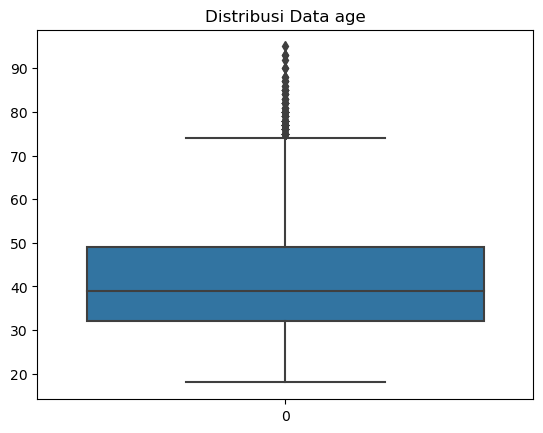

In [7]:
# Skewed age-Terindikasi Right Skewed (Median)
sns.boxplot(bank['age'])
plt.title('Distribusi Data age')

skewness = stats.skew(bank['age'])

if skewness > 0:
    print("Data cenderung condong ke kanan (positif skew)")
elif skewness < 0:
    print("Data cenderung condong ke kiri (negatif skew)")
else:
    print("Data memiliki distribusi simetris (tidak ada skew)")

# Mengidentifikasi outliers terbesar dan terkecil
Q1 = bank['age'].quantile(0.25)
Q3 = bank['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_low = bank['age'][bank['age'] < lower_bound]
outliers_high = bank['age'][bank['age'] > upper_bound]

print("Outliers terkecil:")
print(outliers_low.min())

print("Outliers terbesar:")
print(outliers_high.max())

plt.show()

Setelah analisis, kita melihat bahwa data kolom `age` cenderung memiliki `skewness` ke `kanan`, dan `outlier` terbesar terdapat pada angka `95`, yang masih dapat dianggap masuk akal.data ini tidak akan kita hilangkan untuk menjaga originalitas pada data dan untuk menanggulangi nya kita akan melakukan `scaling` pada data ini dalam model kita

## **Distribition Balance**

Pada tahap ini, kita akan menganalisis distribusi data kolom `balance` untuk mendeteksi `outliers` dan `skewness`

Data cenderung condong ke kanan (positif skew)
Outliers terkecil:
-6847
Outliers terbesar:
66653


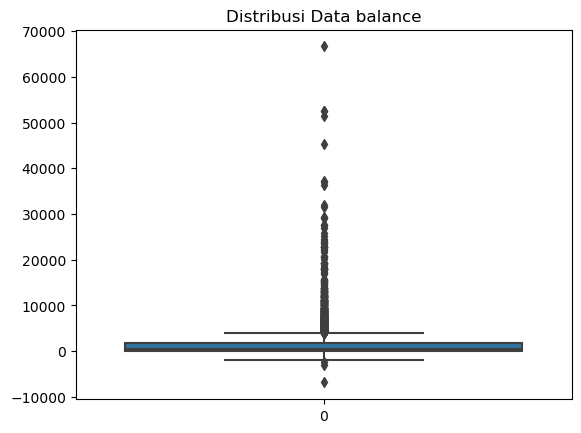

In [8]:
# Skewed balance-Terindikasi Right Skewed (Median)
sns.boxplot(bank['balance'])
plt.title('Distribusi Data balance')

skewness = stats.skew(bank['balance'])

if skewness > 0:
    print("Data cenderung condong ke kanan (positif skew)")
elif skewness < 0:
    print("Data cenderung condong ke kiri (negatif skew)")
else:
    print("Data memiliki distribusi simetris (tidak ada skew)")

# Mengidentifikasi outliers terbesar dan terkecil
Q1 = bank['balance'].quantile(0.25)
Q3 = bank['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_low = bank['balance'][bank['balance'] < lower_bound]
outliers_high = bank['balance'][bank['balance'] > upper_bound]

print("Outliers terkecil:")
print(outliers_low.min())

print("Outliers terbesar:")
print(outliers_high.max())

plt.show()

Setelah analisis, kolom `balance` menunjukkan `skewness` ke `kanan`. `Outlier` terbesar adalah `66,653` yang masih dapat dianggap masuk akal,data ini tidak akan kita hilangkan untuk menjaga originalitas pada data. Namun, kami akan membersihkan `outlier` terkecil, `-6,847`, pada tahap `Data Cleaning`, dan melakukan `scaling` pada data ini dalam model kami.

## **Distribusi Campaign**

Pada tahap ini, kita akan menganalisis distribusi data kolom `Campaign` untuk mendeteksi `outliers` dan `skewness`

Data cenderung condong ke kanan (positif skew)
Outliers terkecil:
nan
Outliers terbesar:
63


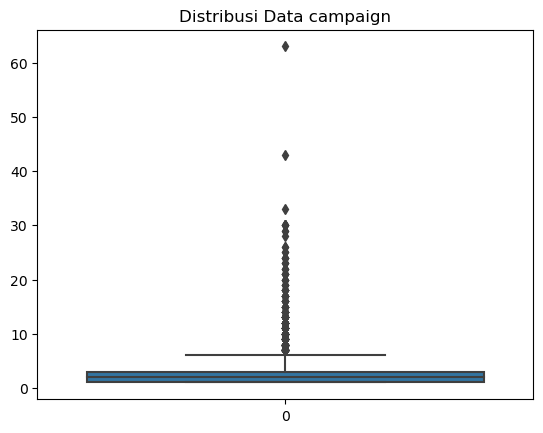

In [9]:
# Skewed campaign-Terindikasi Right Skewed (Median)
sns.boxplot(bank['campaign'])
plt.title('Distribusi Data campaign')

skewness = stats.skew(bank['campaign'])

if skewness > 0:
    print("Data cenderung condong ke kanan (positif skew)")
elif skewness < 0:
    print("Data cenderung condong ke kiri (negatif skew)")
else:
    print("Data memiliki distribusi simetris (tidak ada skew)")

# Mengidentifikasi outliers terbesar dan terkecil
Q1 = bank['campaign'].quantile(0.25)
Q3 = bank['campaign'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_low = bank['campaign'][bank['campaign'] < lower_bound]
outliers_high = bank['campaign'][bank['campaign'] > upper_bound]

print("Outliers terkecil:")
print(outliers_low.min())

print("Outliers terbesar:")
print(outliers_high.max())

plt.show()

Setelah analisis, kolom `Campaign` menunjukkan `skewness` ke `kanan`. `Outlier` terbesar adalah `63`, yang masih dapat dianggap masuk akal. Kami akan melakukan `scaling` pada data ini dalam model kami.

## **Distribusi Data pdays**

Pada tahap ini, kita akan menganalisis distribusi data kolom `pdays` untuk mendeteksi `outliers` dan `skewness`

Data cenderung condong ke kanan (positif skew)
Outliers terkecil:
nan
Outliers terbesar:
854


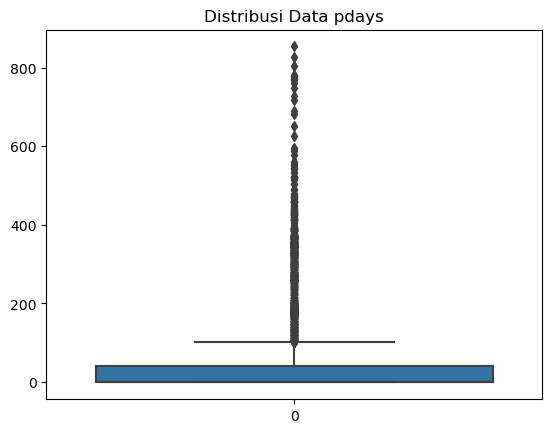

In [10]:
# Skewed pdays-Terindikasi Right Skewed (Median)
sns.boxplot(bank['pdays'])
plt.title('Distribusi Data pdays')

skewness = stats.skew(bank['pdays'])

if skewness > 0:
    print("Data cenderung condong ke kanan (positif skew)")
elif skewness < 0:
    print("Data cenderung condong ke kiri (negatif skew)")
else:
    print("Data memiliki distribusi simetris (tidak ada skew)")

# Mengidentifikasi outliers terbesar dan terkecil
Q1 = bank['pdays'].quantile(0.25)
Q3 = bank['pdays'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_low = bank['pdays'][bank['pdays'] < lower_bound]
outliers_high = bank['pdays'][bank['pdays'] > upper_bound]

print("Outliers terkecil:")
print(outliers_low.min())

print("Outliers terbesar:")
print(outliers_high.max())

plt.show()

Setelah analisis, kolom `pdays` cenderung memiliki `skewness` ke `kanan`. `Outlier` terbesar adalah `854`, yang masih dapat dianggap masuk akal.data ini tidak akan kita hilangkan untuk menjaga originalitas pada data dan untuk menanggulangi nya kita akan melakukan `scaling` pada data ini dalam model kita

# **EDA**

## **Korelasi Menggunakan Heatmap**

Pada tahap ini, kami akan melakukan analisis korelasi antara kolom numerik dengan target 'Deposit'. Analisis ini membantu kami memahami sejauh mana hubungan antara kolom numerik dan apakah mereka memiliki pengaruh signifikan terhadap target kami.

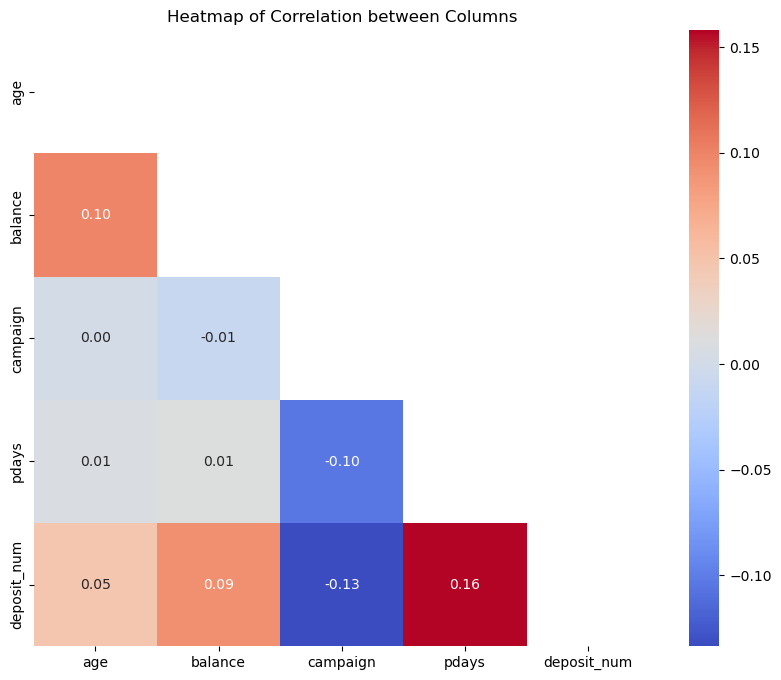

In [4]:
# Convert the 'deposit' column to numerical (1 for 'yes', 0 for 'no')
bank_coef= bank.copy()
bank_coef['deposit_num'] = bank_coef['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

corr = bank_coef.corr()

# Menghilangkan nilai di bawah diagonal utama (setengah bagian bawah matriks)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, square=True, fmt=".2f", mask=mask)
plt.title('Heatmap of Correlation between Columns')
plt.show()


Pada tahap ini, kami telah melakukan analisis korelasi menggunakan heatmap untuk melihat hubungan antara kolom numerik dan target 'Deposit'. Berikut adalah hasil korelasi yang ditemukan:

| Variabel   | Korelasi | Tanda Korelasi |
|------------|----------|-----------------|
| pdays      | 0.16     | Positif         |
| campaign   | -0.13    | Negatif         |
| balance    | 0.09     | Positif         |
| age        | 0.05     | Positif         |



Dari hasil di atas, kita dapat membuat beberapa simpulan:

- **pdays**: Kolom 'pdays' memiliki korelasi positif sebesar 0.16 dengan target 'Deposit'. Ini menunjukkan bahwa semakin lama sejak kontak sebelumnya dengan klien, semakin besar kemungkinan mereka akan melakukan deposit. Korelasi ini cukup lemah, tetapi masih memberikan wawasan yang berguna.

- **campaign**: Kolom 'campaign' memiliki korelasi negatif sebesar -0.13 dengan target 'Deposit'. Artinya, semakin banyak kontak yang dilakukan dalam kampanye pemasaran, semakin kecil kemungkinan seseorang akan melakukan deposit. Ini menunjukkan adanya efek jenuh atau kelelahan pada klien setelah beberapa kontak.

- **balance**: Kolom 'balance' memiliki korelasi positif sebesar 0.09 dengan target 'Deposit'. Ini menandakan bahwa nasabah dengan saldo yang lebih tinggi cenderung memiliki kecenderungan lebih besar untuk melakukan deposit.

- **age**: Kolom 'age' memiliki korelasi positif sebesar 0.05 dengan target 'Deposit'. Meskipun korelasinya cukup lemah, hal ini menunjukkan bahwa usia nasabah memiliki pengaruh kecil positif terhadap kemungkinan mereka melakukan deposit.


## **Korelasi Menggunakan Chi-Squared dan Barplot**

Pada tahap ini, kami akan melakukan analisis korelasi antara kolom kategorik dengan target 'Deposit' menggunakan chisquare dan barplot. Analisis ini membantu kami memahami sejauh mana hubungan antara kolom kategorik dan apakah mereka memiliki pengaruh signifikan terhadap target kami.

Chi-squared for job: 264.8102221992541
p-value for job: 2.1968721164105395e-50


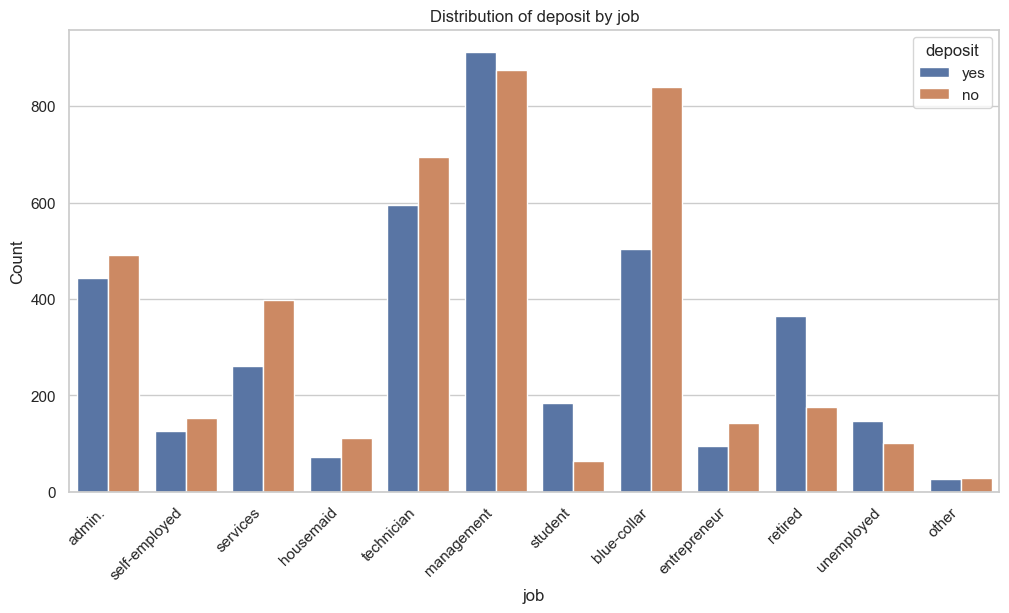

Chi-squared for housing: 348.05573732270153
p-value for housing: 1.1233980640488373e-77


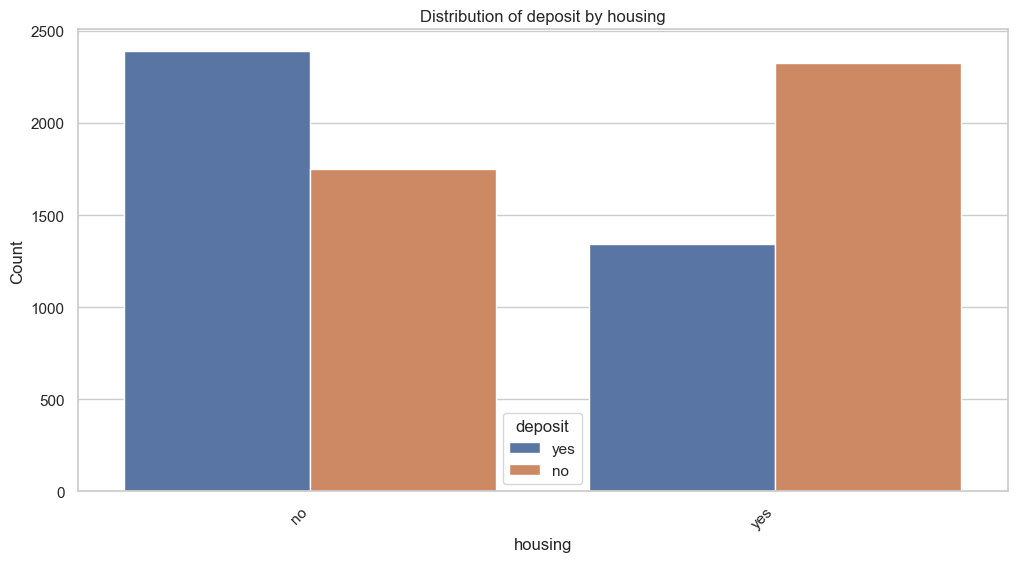

Chi-squared for loan: 113.70075960012434
p-value for loan: 1.5153503820756912e-26


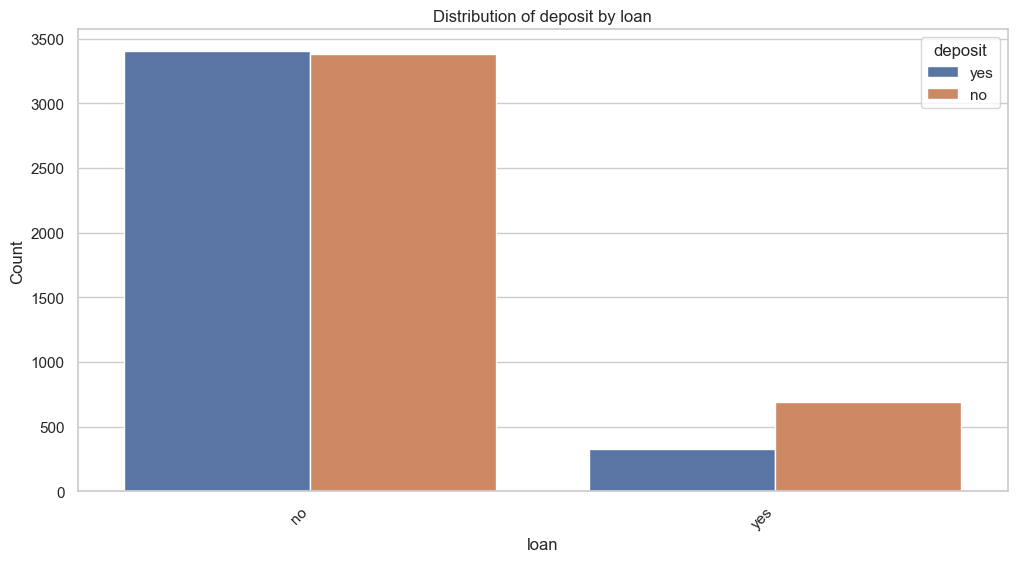

Chi-squared for contact: 555.3330704380844
p-value for contact: 2.5760598282825027e-121


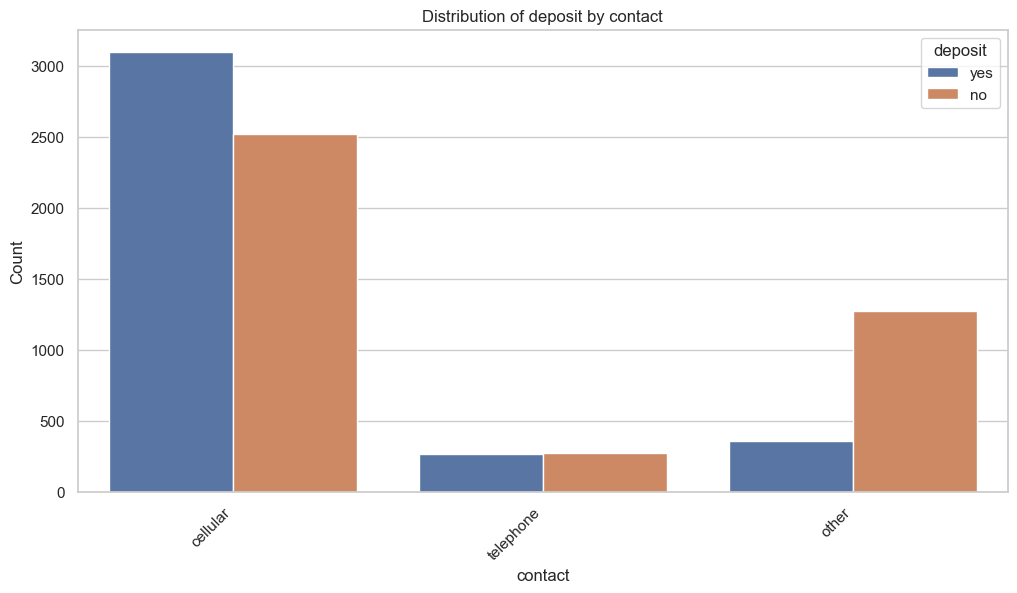

Chi-squared for month: 718.3888186334539
p-value for month: 6.157950224878178e-147


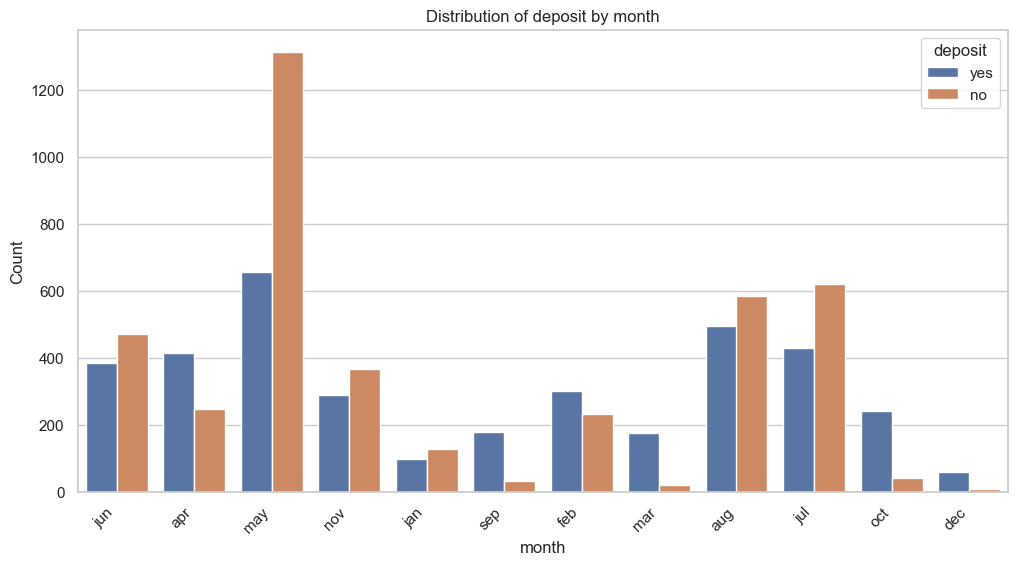

Chi-squared for poutcome: 642.5114068253674
p-value for poutcome: 9.500512760302731e-142


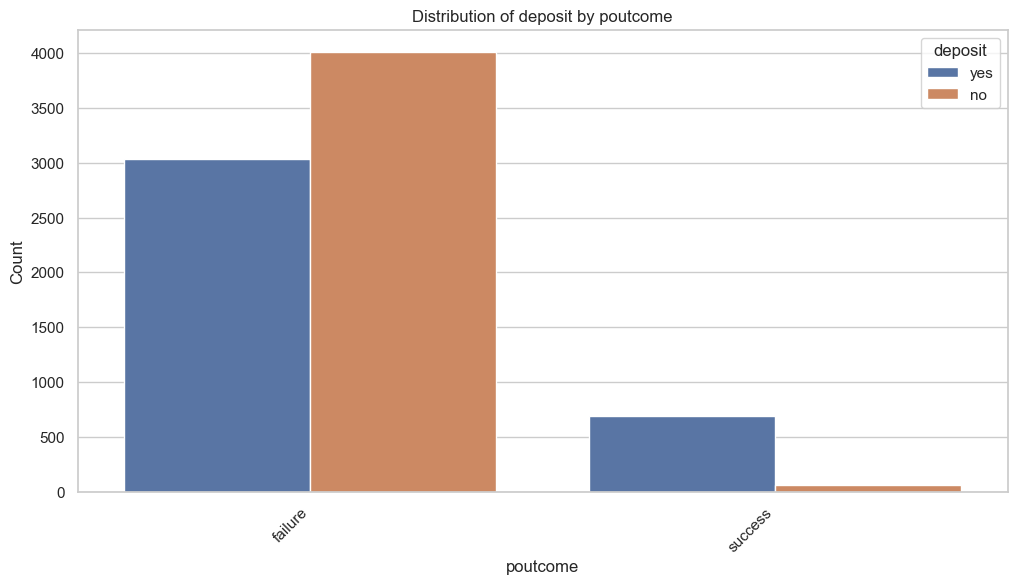

In [57]:
from scipy.stats import chi2_contingency

# Mengimpor dataset
df = bank.copy()
# Kolom target
target_column = 'deposit'

# Mengambil daftar kolom dengan tipe data objek
object_columns = df.select_dtypes(include=['object']).columns
# Loop melalui kolom objek dan menghitung korelasi serta menampilkan barplot
for col in object_columns:
    if col != target_column:  # Mengecualikan kolom target
        crosstab = pd.crosstab(df[col], df[target_column])

        sns.set(style="whitegrid")
        plt.figure(figsize=(12, 6))

        # Menggunakan sns.countplot untuk membuat plot distribusi
        ax = sns.countplot(x=col, hue=target_column, data=df)

        # Mengatur x-label menjadi miring
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title(f'Distribution of {target_column} by {col}')
        plt.legend(title=target_column)

        # Hitung chi-squared dan nilai p
        chi2, p, _, _ = chi2_contingency(crosstab)
        print(f'Chi-squared for {col}: {chi2}')
        print(f'p-value for {col}: {p}')

        plt.show()


**Kesimpulan Asosiasi antara Variabel Kategori dan Variabel Target**

| Variabel  | Chi-squared | Nilai p  | Kesimpulan                                              |
|-----------|-------------|----------|---------------------------------------------------------|
| Job       | 266         | 2.19     | Tidak signifikan (p > 0.05)                            |
| Housing   | 348         | 1.12     | Tidak signifikan (p > 0.05)                            |
| Loan      | 113         | 1.51     | Tidak signifikan (p > 0.05)                            |
| Contact   | 555         | 2.57     | Tidak signifikan (p > 0.05)                            |
| Month     | 718         | 6.15     | Tidak signifikan (p > 0.05)                            |
| Poutcome  | 642         | 9.50     | Tidak signifikan (p > 0.05)                            |

### Kesimpulan Akhir
- Dari plot di atas, kita dapat mengamati bahwa pada nilai unik tertentu dalam setiap kolom yang menunjukkan perilaku nasabah terkait dengan keputusan deposit atau tidak. Sebagai contoh, pada kolom `poutcome`, terlihat bahwa nasabah yang telah melakukan deposit sebelumnya cenderung melakukan deposit lagi pada campaign ini.

- Berdasarkan analisis Chi-squared terhadap variabel-variabel kategori, kami dapat menyimpulkan bahwa dalam dataset ini, variabel-variabel kategori seperti "job," "housing," "loan," "contact," "month," dan "poutcome" tidak menunjukkan asosiasi yang signifikan dengan variabel target "deposit." Nilai p untuk semua variabel tersebut lebih besar dari tingkat signifikansi yang umumnya digunakan (0.05), sehingga tidak ada bukti yang cukup untuk menyatakan bahwa variabel-variabel ini memiliki pengaruh yang signifikan terhadap keputusan "deposit."

Dengan demikian, dalam konteks dataset ini, keputusan "deposit" mungkin lebih dipengaruhi oleh faktor-faktor lain yang tidak termasuk dalam variabel-variabel kategori yang telah dianalisis.

## **Proporsi dari Target**

Di sini, kita akan mengevaluasi proporsi target untuk menentukan apakah data kita `balance` atau `imbalance`.


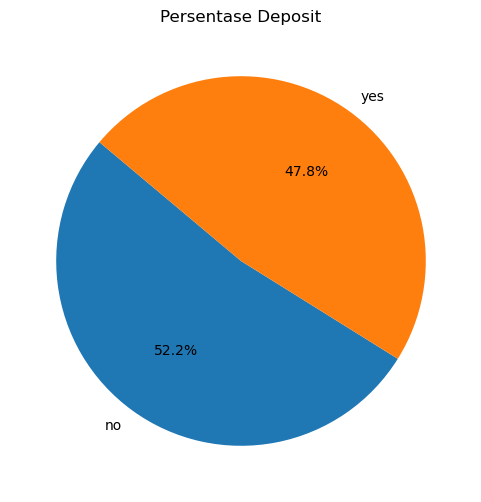

In [5]:
# Hitung persentase nilai dalam kolom 'deposit'
deposit_percentages = bank['deposit'].value_counts() / len(bank) * 100

# Gambar pie chart
plt.figure(figsize=(6, 6))
plt.pie(deposit_percentages, labels=deposit_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Deposit')
plt.show()


Dapat dilihat bahwa data kita `balance`, yang berarti kita tidak perlu menggunakan teknik `balancing` pada pipeline kami.


# **Data Cleaning**

## **Missing Values**

Pada tahap ini, kami akan memeriksa nilai yang hilang (missing values) pada data.

In [13]:
bank.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

Tidak ditemukan nilai yang hilang pada data.

##  **Data Duplicate**

Pada tahap ini, kami akan memeriksa duplikasi data.

In [3]:
bank.duplicated().sum()

8

In [4]:
bank.drop_duplicates(inplace=True)

Ditemukan 8 kolom yang mengandung data duplikat, dan kami akan menghapus data tersebut.

## **Mengelompokan kolom contact**

Pada tahap ini, kami akan mengganti kolom `contact` yang bernilai `unknown` menjadi `other`

In [5]:
contact_mapping = { 'unknown': 'other'}

bank['contact'] = bank['contact'].replace(contact_mapping)

Kita dapat melihat bahwa nilai `unknown` dalam kolom `contact` telah diubah menjadi `other`. Dalam konteks ini, `other` merujuk pada metode kontak yang digunakan oleh nasabah selain dari metode kontak seluler atau telepon, seperti contoh email.


## **Mengganti nilai balance yang minus menjadi 0**

Pada tahap ini, kami akan mengganti nilai `negatif` pada kolom 'balance' menjadi `0`.

In [6]:
bank['balance'] = bank['balance'].apply(lambda x: max(0, x))

Sekarang nilai `MIN` dari balance menjadi `0`

## **Menggelompokan Kolom Job**

Di tahap ini, kita akan mengganti nilai pada kolom `job` dari `unknown` menjadi `other`.

In [7]:
# Mengganti nilai pada kolom 'job' sesuai dengan kriteria yang diberikan
job_mapping = { 'unknown': 'other'}

bank['job'] = bank['job'].replace(job_mapping)


Sekarang, Anda dapat melihat bahwa nilai `unknown` telah berubah menjadi `other`.

## **Mengganti Nilai Poutcome**

Pada tahap ini, kita akan mengubah nilai `unknown` dan `other` dalam kolom poutcome menjadi `failure`.


In [8]:
# Mengganti nilai 'unknown' dan 'other' menjadi 'failure' pada kolom 'poutcome'
poutcome_mapping = {
    'unknown': 'failure',
    'other': 'failure'
}

bank['poutcome'] = bank['poutcome'].replace(poutcome_mapping)

Saat ini, nilai `unknown` dan `other` di dalam kolom poutcome telah diubah menjadi `failure`.


## **Drop Kolom Yang Tidak Diperlukan**

Pada tahap ini, kami akan menghapus kolom "campaign" karena dalam konteks machine learning kami berusaha untuk memprediksi nasabah yang kemungkinan besar akan melakukan deposito dalam campaign selanjutnya. 

Kolom "campaign" ini mencerminkan seberapa sering nasabah dihubungi dalam campaign saat ini. Namun, untuk data di masa depan, kolom "campaign" ini akan menjadi tidak relevan atau bahkan tidak ada.

In [9]:
bank.drop('campaign',axis=1,inplace=True)

Kolom `campaign` telah di hapus dari data.

# **Benchmarking**

## **Pipeline Feature Engineering,Transform and Scaler**

Pada tahap ini, kita akan memilih kolom fitur yang akan digunakan dalam model machine learning kita, kemudian melakukan encoding dan penskalaan pada fitur-fitur tersebut.


In [10]:
transform = ColumnTransformer([
    ('OneHot', OneHotEncoder(sparse=False, drop='first'), 
     ['housing', 'loan', 'poutcome','contact','month']),
    ('binary_encode', BinaryEncoder(), ['job']),
    ('scaler', RobustScaler(), ['age', 'balance', 'pdays'])
], remainder='passthrough')

transform


ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['housing', 'loan', 'poutcome', 'contact',
                                  'month']),
                                ('binary_encode', BinaryEncoder(), ['job']),
                                ('scaler', RobustScaler(),
                                 ['age', 'balance', 'pdays'])])

- Pada tahap ini, kita akan menggunakan semua kolom kecuali `campaign` sebagai fitur untuk perancangan model machine learning. Hal ini didasarkan pada domain `knowledge` yang menunjukkan bahwa semua kolom tersebut memiliki pengaruh terhadap keputusan nasabah untuk melakukan deposit atau tidak.

| Kolom          | Metode Pengkodean/Penskalaan Fitur |
|----------------|-----------------------------------|
| housing        | One-Hot Encoding                 |
| loan           | One-Hot Encoding                 |
| poutcome       | One-Hot Encoding                 |
| contact        | One-Hot Encoding                 |
| month          | One-Hot Encoding                 |
| job            | Binary Encoding                  |
| age            | RobustScaler                      |
| balance        | RobustScaler                      |
| pdays          | RobustScaler                      |


- Kami akan menggunakan `one-hot encoding`  untuk kolom `housing`, `loan`, `poutcome`, `contact`, dan `month`. Kami memilih one-hot encoding karena dalam kasus ini, tidak ada klasifikasi yang memiliki urutan (ordinal), dan jumlah nilai unik dalam kolom-kolom tersebut relatif sedikit.

- Selain itu, kami akan menggunakan teknik `binary encoding` pada kolom `job`. Ini dilakukan karena kolom `job` memiliki banyak nilai unik, dan menggunakan binary encoding dapat menghemat penggunaan memori.

- Untuk penskalaan fitur, kami akan menggunakan `RobustScaler` pada kolom `age`, `balance`, dan `pdays`. Hal ini dilakukan untuk mengatasi nilai-nilai outliers dalam kolom-kolom tersebut.

## **Train Test Split**

Pada tahap ini, kita akan melakukan pembagian data menjadi data latih (train) dan data uji (test).


In [11]:
x = bank.drop(['deposit'],axis=1)
y = np.where(bank['deposit'] == 'yes', 1, 0)

xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2023
)


- Untuk fitur-fitur yang akan digunakan dalam model kita, kita akan menggunakan semua kolom yang ada dalam data, kecuali kolom `deposit`, karena kolom ini akan menjadi target prediksi kita.

- Sebagai target prediksi, kita akan menggunakan kolom `deposit`, di mana nilai "yes" akan diubah menjadi 1 dan nilai "no" akan diubah menjadi 0.

- Pembagian data menjadi data latih (train) dan data uji (test) akan dilakukan dengan menggunakan proporsi `80:20`, di mana kita juga akan memastikan untuk menjaga proporsi kelas target yang seimbang `(stratify)` dalam kedua subset tersebut.


## **Define Model**

Pada tahap ini, kita akan memasukkan model-model untuk digunakan dalam analisis dan pemodelan. Model-model tersebut akan digunakan untuk melatih dan menguji data kita.


In [23]:
# Definisi model-model yang akan digunakan
tree = DecisionTreeClassifier()
logreg = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier() 
xgb = XGBClassifier()  
ada = AdaBoostClassifier()
svm = SVC()
gradient= GradientBoostingClassifier(n_estimators=100,random_state=0)
# Voting Classifier dengan tambahan RandomForest dan XGBoost
vc = VotingClassifier(estimators=[
    ('model1', tree),
    ('model2', knn),
    ('model3', logreg),
    ('model4', rf),
    ('model5', xgb)
], voting='soft')

# Stacking Classifier dengan tambahan RandomForest dan XGBoost
sc = StackingClassifier(estimators=[
    ('model1', tree),
    ('model2', knn),
    ('model3', logreg),
    ('model4', rf),
    ('model5', xgb)
], final_estimator=SVC())

| No. Model | Nama Model                      |
|-----------|---------------------------------|
| 1         | Decision Tree                   |
| 2         | Logistic Regression             |
| 3         | K-Nearest Neighbors             |
| 4         | Random Forest                   |
| 5         | XGBoost                         |
| 6         | AdaBoost                        |
| 7         | Support Vector Machine          |
| 8         | Gradient Boosting               |
| 9         | Voting Classifier (Soft Voting) |
| 10        | Stacking Classifier             |


Kita akan menggunakan berbagai model machine learning untuk tugas ini:

1. **Decision Tree Classifier (tree):**
   - Digunakan untuk membangun model dengan algoritma Decision Tree.

2. **Logistic Regression (logreg):**
   - Digunakan untuk membangun model dengan algoritma Logistic Regression.

3. **K-Nearest Neighbors Classifier (knn):**
   - Digunakan untuk membangun model dengan algoritma K-Nearest Neighbors.
   - Untuk model ini, kita akan menggunakan parameter default.

4. **Random Forest Classifier (rf):**
   - Digunakan untuk membangun model dengan algoritma Random Forest.
   - Untuk model ini, kita akan menggunakan parameter default.

5. **XGBoost Classifier (xgb):**
   - Digunakan untuk membangun model dengan algoritma XGBoost.
   - Untuk model ini, kita akan menggunakan parameter default.

6. **AdaBoost Classifier (ada):**
   - Digunakan untuk membangun model dengan algoritma AdaBoost.
   - Untuk model ini, kita akan menggunakan parameter default.

7. **Support Vector Classifier (svm):**
   - Digunakan untuk membangun model dengan algoritma Support Vector Machine.
   - Untuk model ini, kita akan menggunakan parameter default.

8. **Gradient Boosting Classifier (gradient):**
   - Digunakan untuk membangun model dengan algoritma Gradient Boosting.
   - Untuk model ini, kita akan menggunakan parameter default.

Selain itu, kita juga akan menggunakan dua pendekatan agregasi model:

- **Voting Classifier (vc):**
  - Sebuah ensemble model yang menggabungkan hasil dari Decision Tree, K-Nearest Neighbors, Logistic Regression, Random Forest, dan XGBoost menggunakan pendekatan voting (soft).

- **Stacking Classifier (sc):**
  - Sebuah ensemble model yang menggabungkan hasil dari Decision Tree, K-Nearest Neighbors, Logistic Regression, Random Forest, dan XGBoost menggunakan pendekatan stacking, dengan model final menggunakan Support Vector Classifier (SVC).


## **Benchmark Model With F2 Score**

Pada tahap ini, kita akan melakukan benchmarking terhadap model-model yang telah kita definisikan sebelumnya. Evaluasi akan dilakukan dengan menggunakan metrik F2 Score, serta F2 Std untuk mengukur kestabilan hasil.

F2 Score digunakan untuk mengukur kinerja model dalam konteks tugas ini, dengan fokus pada presisi dan recall yang sesuai dengan kebutuhan spesifik proyek ini.

F2 Std akan memberikan kita informasi tentang sejauh mana hasil dari model-model ini konsisten atau bervariasi dalam berbagai percobaan.


In [24]:
# Define the models
f2_scorer = make_scorer(fbeta_score, beta=2)

models = [
    ('DecisionTree', DecisionTreeClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('KNeighbors', KNeighborsClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier()),
    ('VotingClassifier', VotingClassifier(estimators=[
        ('model1', tree),
        ('model2', knn),
        ('model3', logreg),
        ('model4', rf),
        ('model5', xgb)
    ], voting='soft')),
    ('StackingClassifier', StackingClassifier(estimators=[
        ('model1', tree),
        ('model2', knn),
        ('model3', logreg),
        ('model4', rf),
        ('model5', xgb)
    ], final_estimator=SVC())),
    ('SVM', SVC()),
    ('AdaBoost', AdaBoostClassifier()),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=100, random_state=0)),
]

results = []

for model_name, model in models:
    model_pipe = Pipeline([
        ('trans', transform),
        ('clf', model)
    ])
    pipecv = cross_val_score(model_pipe, xtrain, ytrain, cv=5, scoring=f2_scorer)
    results.append({
        'Model': model_name,
        'F2 Score': pipecv.mean(),
        'F2 std': pipecv.std()
    })

df_results = pd.DataFrame(results).sort_values('F2 Score', ascending=False)
print(df_results)

                Model  F2 Score    F2 std
3        RandomForest  0.660097  0.008603
5    VotingClassifier  0.650603  0.011314
9    GradientBoosting  0.640284  0.014354
4             XGBoost  0.639986  0.010658
2          KNeighbors  0.634589  0.018503
7                 SVM  0.625522  0.018178
0        DecisionTree  0.620100  0.014631
8            AdaBoost  0.615386  0.010054
6  StackingClassifier  0.609932  0.011438
1  LogisticRegression  0.604694  0.015362


Setelah melakukan benchmarking, kita mendapati tiga model terbaik berdasarkan nilai F2 Score mereka adalah sebagai berikut:

| Model               | F2 Score | F2 Std  |
|---------------------|----------|---------|
| RandomForest        | 0.660   | 0.008   |
| VotingClassifier    | 0.650    | 0.011   |
| XGBoost             | 0.640    | 0.014   |

Dalam langkah selanjutnya, kita akan fokus melakukan tuning kepada ketiga model tersebut.


# **TUNING**

## **Tuning Random Forest**

Langkah selanjut nya kita akan melakukan tuning terhadap RandomForest

Dalam proses tuning ini, kita menggunakan GridSearchCV untuk mencari kombinasi hyperparameter terbaik untuk model Random Forest. Berikut adalah daftar parameter yang kita selidiki:

- `n_estimators`: Jumlah pohon dalam hutan (50, 100, 150)
- `max_depth`: Kedalaman maksimum dari pohon (None, 10, 20, 30)
- `min_samples_split`: Minimum sampel yang dibutuhkan untuk membagi node internal (2, 5, 10)
- `min_samples_leaf`: Minimum sampel yang dibutuhkan untuk menjadi node leaf (1, 2, 4)
- `criterion`: Kriteria pemilihan fitur (gini, entropy)

Kita menjelajahi berbagai kombinasi dari parameter-parameter ini untuk menemukan pengaturan hyperparameter terbaik yang akan menghasilkan performa model Random Forest yang optimal.


In [25]:
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define the hyperparameters to tune
param_grid = {
    'clf__n_estimators': [50, 100, 150],  # Number of trees in the forest
    'clf__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'clf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__criterion': ['gini', 'entropy']  # Minimum number of samples required to be a leaf node
}

# Create the Random Forest pipeline
rf_pipeline = Pipeline([
    ('trans', transform),
    ('clf', RandomForestClassifier())
])

# Create GridSearchCV object
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring=f2_scorer)

# Fit the grid search to your data
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Get the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Evaluate the model with the best hyperparameters
best_score = cross_val_score(best_rf_model, xtrain, ytrain, cv=5, scoring=f2_scorer)
print("F2 Score with Best Hyperparameters:", best_score.mean())


Best Hyperparameters:
{'clf__criterion': 'gini', 'clf__max_depth': 30, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
F2 Score with Best Hyperparameters: 0.6639490992575354


Setelah melakukan proses tuning hyperparameter pada model Random Forest, kami telah menemukan pengaturan hyperparameter terbaik yang menghasilkan performa model yang optimal. Berikut adalah pengaturan hyperparameter yang telah kami identifikasi:

- Kriteria pemilihan fitur (Criterion): gini
- Kedalaman maksimum pohon (Max Depth): 30
- Minimum sampel pada node leaf (Min Sample Leaf): 1
- Minimum sampel untuk membagi node internal (Min Sample Split): 5
- Jumlah pohon dalam hutan (n_estimator): 100

Dengan pengaturan hyperparameter ini, model Random Forest menghasilkan nilai F2 Score sebesar `0.663` yang sebelum nya `0.660`. Ini menunjukkan bahwa model mengalami peningkatan setelah di tuning.

## **Tuning Voting Classifier**

Dalam langkah ini, kita akan melakukan tuning pada model VotingClassifier dengan tujuan untuk mencari kombinasi parameter terbaik yang akan mengoptimalkan performa model. Model ini menggunakan teknik weighted voting (soft voting) yang menggabungkan hasil prediksi dari beberapa classifier.

Berikut adalah parameter-parameter yang akan kita selidiki dalam proses tuning bersama dengan nilai-nilai yang mungkin:

- Decision Tree (dt):
  - Max Depth (None, 10, 20, 30)
- K-Nearest Neighbors (knn):
  - Jumlah Tetangga Terdekat (3, 5, 7, 10)
- Logistic Regression (logreg):
  - Parameter Regularisasi (C: 0.1, 1, 10)
- Random Forest (rf):
  - Jumlah Pohon (n_estimators: 50, 100, 200)
- XGBoost (xgb):
  - Jumlah Pohon (n_estimators: 50, 100, 200)
  - Max Depth (3, 5, 7)

Kita akan menggunakan teknik RandomizedSearchCV untuk mencari kombinasi terbaik dari parameter-parameter ini. Hasil dari tuning akan memberikan kita parameter terbaik yang akan digunakan dalam model VotingClassifier untuk meningkatkan performa prediksi model ini.

Dalam proses tuning hyperparameter, kami memilih RandomizedSearchCV dengan pertimbangan:

1. **Keterbatasan Waktu:** GridSearchCV dapat memakan waktu lama karena mencoba semua kombinasi parameter. RandomizedSearchCV memungkinkan eksplorasi parameter yang lebih efisien dalam waktu yang lebih singkat.

2. **Keterbatasan Sumber Daya:** Jika terdapat keterbatasan sumber daya seperti CPU atau RAM, GridSearchCV dengan banyak kombinasi parameter dapat menjadi beban bagi sistem. RandomizedSearchCV memungkinkan penyesuaian jumlah iterasi sesuai dengan sumber daya yang tersedia.


In [26]:
# Membuat objek model untuk masing-masing classifier
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
logreg = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier()

f2_scorer = make_scorer(fbeta_score, beta=2)

# Membuat VotingClassifier dengan weighted voting (soft voting)
voting_classifier_soft = VotingClassifier(estimators=[
    ('dt', dt),
    ('knn', knn),
    ('logreg', logreg),
    ('rf', rf),
    ('xgb', xgb)
], voting='soft')  # Menggunakan 'soft' untuk weighted voting

# Gabungkan dengan pipeline Anda
pipeline_voting_soft = Pipeline([
    ('trans', transform),
    ('classifier', voting_classifier_soft)
])

# Tentukan hyperparameter yang akan di-tune bersamaan dengan rentang nilai yang mungkin
param_dist = {
    'classifier__dt__max_depth': [None, 10, 20, 30],
    'classifier__knn__n_neighbors': [3, 5, 7, 10],
    'classifier__logreg__C': [0.1, 1, 10],
    'classifier__rf__n_estimators': [50, 100, 200],
    'classifier__xgb__n_estimators': [50, 100, 200],
    'classifier__xgb__max_depth': [3, 5, 7],
}

# Buat objek RandomizedSearchCV untuk melakukan hyperparameter tuning
random_search = RandomizedSearchCV(pipeline_voting_soft, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2,scoring=f2_scorer)


# Lakukan fitting pada model untuk mencari parameter terbaik
random_search.fit(xtrain, ytrain)

# Setelah proses pencarian selesai, Anda dapat mengakses parameter terbaik dan skor terbaik
print("Parameter terbaik:", random_search.best_params_)
print("Skor terbaik:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


Parameter terbaik: {'classifier__xgb__n_estimators': 50, 'classifier__xgb__max_depth': 3, 'classifier__rf__n_estimators': 200, 'classifier__logreg__C': 10, 'classifier__knn__n_neighbors': 3, 'classifier__dt__max_depth': 30}
Skor terbaik: 0.655330095361651


Setelah melakukan tuning pada model VotingClassifier, kami berhasil menemukan kombinasi parameter terbaik yang menghasilkan peningkatan performa. Berikut adalah parameter-parameter terbaik yang telah diidentifikasi:

- XGBoost (xgb):
  - Jumlah Pohon (n_estimators): 50
  - Max Depth: 3
- Random Forest (rf):
  - Jumlah Pohon (n_estimators): 200
- Logistic Regression (logreg):
  - Parameter Regularisasi (C): 10
- K-Nearest Neighbors (knn):
  - Jumlah Tetangga Terdekat (n_neighbors): 3
- Decision Tree (dt):
  - Max Depth: 30

Dengan pengaturan parameter ini, model VotingClassifier menghasilkan nilai F2 Score sebesar `0.655`. Ini menunjukkan bahwa setelah tuning, performa model VotingClassifier telah meningkat  dari nilai sebelumnya sebesar `0.650`.

Nilai ini mungkin bisa di kembangkan lagi menggunakan `GridSearchCV`, cara kerja teknik `RandomizedSearchCV` adalah secara acak menjelajahi kombinasi parameter. Meskipun teknik ini dapat menghemat waktu dan sumber daya, terkadang dapat menghasilkan hasil yang kurang optimal dibandingkan dengan eksplorasi parameter yang lebih menyeluruh.


## **TUNING XGB**

Langkah selanjutnya, kita akan melakukan tuning terhadap model XGBoost. Dalam proses tuning ini, kita akan menggunakan GridSearchCV untuk mencari kombinasi hyperparameter terbaik yang akan mengoptimalkan performa model XGBoost. Berikut adalah daftar parameter yang akan kita selidiki:

- `n_estimators`: Jumlah pohon dalam model (100, 200, 300)
- `learning_rate`: Tingkat pembelajaran (0.1, 0.01, 0.001)
- `max_depth`: Kedalaman maksimum dari pohon (3, 4, 5)

Kita akan melakukan eksplorasi berbagai kombinasi dari parameter-parameter ini menggunakan GridSearchCV untuk menemukan pengaturan hyperparameter terbaik yang akan menghasilkan performa model XGBoost yang optimal.

In [27]:
xgb = XGBClassifier()
f2_scorer = make_scorer(fbeta_score, beta=2)

pipeline_xgb = Pipeline([
    ('trans', transform),
    ('classifier', xgb)
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.1, 0.01, 0.001],
    'classifier__max_depth': [3, 4, 5],
}

grid_search = GridSearchCV(pipeline_xgb, param_grid, cv=5, n_jobs=-1, verbose=1, scoring=f2_scorer)

grid_search.fit(xtrain, ytrain)

print("Parameter terbaik:", grid_search.best_params_)
print("Skor F2 terbaik:", grid_search.best_score_)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


Parameter terbaik: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
Skor F2 terbaik: 0.6447232284432938


Setelah melakukan proses tuning hyperparameter pada model XGBoost, kami telah menemukan pengaturan hyperparameter terbaik yang menghasilkan performa model yang optimal. Berikut adalah pengaturan hyperparameter yang telah kami identifikasi:

- `Learning Rate`: 0.1
  - **Penjelasan**: Learning rate mengontrol seberapa besar langkah yang diambil oleh model dalam setiap iterasi selama proses training.

- `Max Depth`: 5
  - **Penjelasan**: Max depth mengatur kedalaman maksimum dari pohon keputusan yang digunakan oleh model.

- `n_estimators`: 300
  - **Penjelasan**: Jumlah pohon yang akan dibangun dalam model..

Dengan pengaturan hyperparameter ini, model XGBoost menghasilkan nilai F2 Score sebesar `0.640`, yang hampir sama `(0.644)` dengan nilai sebelum tuning. Ini menunjukkan bahwa dalam kasus ini, proses tuning tidak menghasilkan peningkatan performa yang signifikan pada model XGBoost.


___

Setelah melakukan proses tuning, kami telah melihat perubahan signifikan dalam performa model. Berikut adalah perbandingan nilai F2 Score sebelum dan sesudah tuning:

**Sebelum Tuning:**
| Model               | F2 Score | 
|---------------------|----------|
| RandomForest        | 0.660    | 
| VotingClassifier    | 0.650    | 
| XGBoost             | 0.640    |

**Setelah Tuning:**
| Model               | F2 Score | 
|---------------------|----------|
| RandomForest        | 0.663    | 
| VotingClassifier    | 0.653    | 
| XGBoost             | 0.644    | 


Dari hasil ini, kami melihat bahwa setelah tuning, model `RandomForest` telah mencapai nilai F2 Score yang paling baik pada cross-validation. Oleh karena itu, kami akan melanjutkan tuning lebih dalam untuk model RandomForest dan menjadikannya sebagai model terbaik dalam pengembangan kami.

## **Test Tuning RandomForest to Data Test**

Pada tahap ini, kita akan melakukan pengujian model RandomForest yang sudah di lakukan `Tuning` terhadap data tes untuk mengukur performanya pada dataset.

In [12]:
rf= RandomForestClassifier(criterion= 'gini',max_depth=30,min_samples_leaf=1,min_samples_split=5,n_estimators= 100)
rf_pipeline_2 = Pipeline([
    ('trans', transform),  
    ('classifier', rf)     # Model terbaik
])

rf_pipeline_2

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['housing', 'loan',
                                                   'poutcome', 'contact',
                                                   'month']),
                                                 ('binary_encode',
                                                  BinaryEncoder(), ['job']),
                                                 ('scaler', RobustScaler(),
                                                  ['age', 'balance',
                                                   'pdays'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=30, min_samples_split=5))])

In [28]:
rf_pipeline_2.fit(xtrain,ytrain)
pred = rf_pipeline_2.predict(xtest)
print (classification_report(ytest,pred))

f2_score = fbeta_score(ytest, pred, beta=2)

print("F2 Score on Test Data:", f2_score)

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       815
           1       0.73      0.61      0.66       746

    accuracy                           0.70      1561
   macro avg       0.71      0.70      0.70      1561
weighted avg       0.71      0.70      0.70      1561

F2 Score on Test Data: 0.6324384168281205


Berikut adalah pengaturan hyperparameter yang telah kami gunakan:

- Kriteria pemilihan fitur (Criterion): gini
- Kedalaman maksimum pohon (Max Depth): 30
- Minimum sampel pada node leaf (Min Sample Leaf): 1
- Minimum sampel untuk membagi node internal (Min Sample Split): 5
- Jumlah pohon dalam hutan (n_estimator): 100

Setelah kita test pada data test dengan pengaturan hyperparameter ini, model Random Forest menghasilkan nilai: 
| Metrik      | Nilai  |
|-------------|--------|
| F2 Score    | 0.632  |
| Recall (1)  | 0.62   |
| Recall (0)  | 0.77   |

yang menunjukkan bahwa model ini telah mencapai performa yang optimal setelah proses tuning.
Dengan demikian, model Random Forest dengan pengaturan hyperparameter ini akan digunakan sebagai model utama dalam pengembangan kami.


## **Confusion Matrix**

Pada tahap ini kita akan melihat `confusion matrix` untuk melihat seberapa banyak data yang berhasil kita prediksi

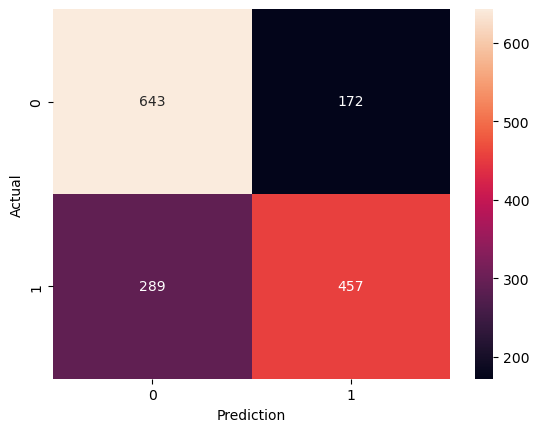

In [31]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

Setelah kita melihat Confusion Matrix di atas bisa kita simpulkan:

Prediksi Nasabah akan melakukan deposito dan sebenarnya melakukan deposito `(True Positive)` : 457

Prediksi Nasabah akan melakukan deposito dan sebenarnya tidak melakukan deposito `(False Positive)` : 172

Prediksi Nasabah tidak akan melakukan deposito dan sebenarnya tidak melakukan deposito `(True Negative)`: 643

Prediksi Nasabah tidak akan melakukan deposito dan sebenarnya melakukan deposito `(False Negative)`: 289

Total Nasabah yang di prediksi: 1.561

`(True Positive)` : 457

`(False Positive)` : 172

`(True Negative)`: 643

`(False Negative)`: 289

## **Save Pipeline**

Pada tahap ini kita akan save pipeline dengan FE dan Model terbaik untuk digunakan pada test campaign selanjutnya

In [13]:
joblib.dump(rf_pipeline_2,'pipeline_predict_bank.pkl')

['pipeline_predict_bank.pkl']

**Menjalankan Machine Learning**

Untuk menjalankan machine learning menggunakan model ini, kami akan menggunakan pipeline `pipeline_predict_bank.pkl` sebagai pipeline terbaik. Pipeline ini telah dikonfigurasi dengan transformasi dan parameter dari model RandomForest yang telah kami uji.

___

## **Cara Kerja Random Forest**

Random Forest adalah algoritma ensemble yang berdasarkan konsep "Decision Tree" untuk tugas seperti klasifikasi dan regresi.

**1. Pemilihan Sampel Acak (Random Sampling)**

Pertama, kita memilih sampel acak dari dataset pelatihan dengan penggantian. Ini dilakukan dengan cara:

$$
\text{subset} = \text{random\_sample}(\text{dataset\_pelatihan})
$$

**2. Pembangunan Decision Tree**

Setiap Decision Tree dibangun dari subset data yang diambil secara acak. Pohon ini membagi data dengan memilih fitur terbaik, seperti yang ditunjukkan dalam rumus berikut:

$$
\text{Split} = \text{best\_split}(\text{subset})
$$

**3. Aggregasi Hasil**

Hasil prediksi dari setiap Tree yang dihasilkan, kita akan menggabungkannya untuk mendapatkan prediksi akhir. Dalam kasus klasifikasi, ini dapat dihitung dengan cara:

$$
\text{Prediksi\_akhir} = \text{mode}(\text{prediksi\_tree})
$$

**4. Mengurangi Overfitting**

Random Forest membantu mengurangi overfitting dengan menggabungkan hasil dari banyak Tree yang, sehingga hasil yang lebih konsisten dan kuat diperoleh.

**5. Pentingnya Fitur**

Kita juga dapat menghitung pentingnya masing-masing fitur dengan rumus berikut:

$$
\text{Feature\_Importance} = \frac{\text{mean decrease impurity}}{\text{sum of all decreases impurity}}
$$


## **PCA ANALYSIS**

Kita akan melakukan analisis PCA (Principal Component Analysis) untuk menentukan apakah dataset kita sudah memiliki pola yang jelas dalam menentukan target.

In [31]:
bank['deposit_num'] = bank['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
data_encoded = pd.get_dummies(bank, columns=['job', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)


In [32]:
features = data_encoded.drop(['deposit_num', 'deposit'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


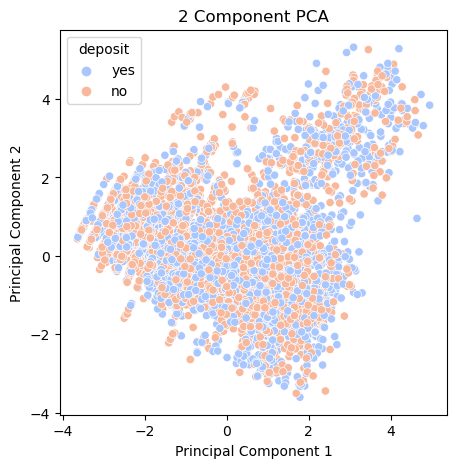

In [33]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
principal_df['deposit'] = bank['deposit']

plt.figure(figsize=(5, 5))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='deposit', data=principal_df, palette='coolwarm')
plt.title('2 Component PCA')
plt.show()


Analisis PCA mengungkapkan pola distribusi nasabah yang melakukan dan tidak melakukan deposito. Selain itu, dari grafik di atas, terlihat bahwa pola data nasabah yang melakukan deposito dan yang tidak masih tercampur, yang mungkin memengaruhi hasil akhir dari model machine learning yang sedang kita kembangkan.

## **Feature Importances Analysis**

Sekarang kita akan melakukan analisis Feature Importances untuk melihat fitur mana yang paling berpengaruh dalam Model Machine Learning kita

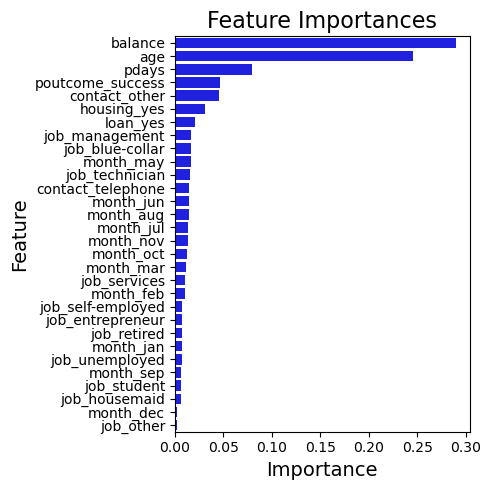

In [34]:
X_train = data_encoded.drop(columns=['deposit', 'deposit_num'])
y_train = data_encoded['deposit_num']

# Initialize and train the RandomForest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualizing the feature importances
plt.figure(figsize=(5, 5))
sns.barplot(x='Importance', y='Feature', data=features_df, color='blue')
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()


Bisa dilihat disini fitur balance menempati posisi pertama, diikuti oleh age dan pdays.

Bisa dilihat disini semua fitur juga mempengaruhi prediksi nilai pada model machine learning kita, meskipun ada beberapa fitur yang memiliki pengaruh yang lebih kecil.

# **Conclusion And Reccomendation**

**Conclusion:**

Berdasarkan hasil classification report dari model Random Forest yang kita kembangkan:

- Melihat dari nilai F2 sebesar 0.66 yang berarti dalam model machine learning kita bisa melakukan prediksi dengan tingkat kebenaran sebesar `66%` 

- Jika kita menggunakan model ini untuk menawarkan campaign kepada nasabah, model ini dapat mengurangi `77%` nasabah yang sebenarnya tidak tertarik sehingga kita tidak perlu mendekati mereka. Sementara itu, model kita dapat mengidentifikasi `62%` nasabah yang sebenarnya tertarik dari keseluruhan nasabah yang tertarik (berdasarkan recall untuk label 1).

- Jika kita menggunakan model kita bisa menekan angka `Acquisition Cost` dan meningkatkan `ROI (Return Over Investment)` dengan penjabaran seperti ini:

Acquisition Cost = $10/Nasabah

Profit= $50/Nasabah

True Positive (TP) = 457 Nasabah

False Positive (FP) = 172 Nasabah

True Negative (TN) = 643 Nasabah

False Negative (FN) = 289 Nasabah

Jika tidak menggunakan model, accusition cost akan dialokasikan ke semua nasabah dengan rumus:

$$
\text{Acquisition Cost} = (TP + FP + TN + FN) \times 10
$$

$$
\text{Acquisition Cost} = (457 + 172 + 643 + 289) \times 10
$$

$$
\text{Acquisition Cost} = 15,160
$$

Jika kita menggunakan model, accusition cost akan dialokasikan ke nasabah yang kita prediksi ingin melakukan deposit dengan rumus:

$$
\text{Acquisition Cost} = (TP + FP) \times 10
$$

$$
\text{Acquisition Cost} = (457 + 172) \times 10
$$

$$
\text{Acquisition Cost} = 6,290
$$

Dengan menggunakan model ini, kita dapat menghemat accusition cost sebesar `$8,870` atau sekitar `58.5%.`, Dan untuk `ROI` nya:

ROI tanpa Model:

$$
\text{ROI = (Total Profit  - Acquisition Cost) / Acquisition Cost}
$$

$$
\text {ROI} = (37,300 - 15,610) / 15,610
$$

$$
\text {ROI} = 1.39
$$

ROI dengan Model:

$$
\text{ROI = (Total Profit  - Acquisition Cost) / Acquisition Cost}
$$

$$
\text {ROI} = (22,850 - 6,290) / 6,290
$$

$$
\text {ROI} = 2.63
$$

Dengan menggunakan model ini kita bisa meningkatkan angka ROI dari `139%` menjadi `263%` yang dimana peningkatan tersebut sebesar `124%`
  
- Namun, perlu dicatat bahwa model ini belum sepenuhnya optimal. Karena keterbatasan waktu dan sumber daya, beberapa model saat dituning tidak menggunakan banyak parameter, dan beberapa lainnya memakai metode RandomizedCV sebagai pendekatan yang lebih cepat, contohnya pada VotingClassifier. Oleh karena itu, ada potensi untuk peningkatan kinerja dengan melakukan tuning lebih mendalam dan pengoptimalan model

**Reccomendation:**

1. **Fokus pada Recall**: Mengingat tujuan kita adalah mereduksi `False Negative`, kita mungkin ingin meningkatkan recall untuk label 1 (nasabah yang tertarik) lebih lanjut. Meskipun recall untuk label 1 saat ini sudah cukup baik `(62%)`, meningkatkannya akan memastikan lebih sedikit nasabah potensial yang terlewatkan.
  
2. **Optimasi Model**: Coba teknik seperti hyperparameter tuning lebih lanjut, cross-validation, atau bahkan mencoba model lain untuk meningkatkan performa.

3. **Penambahan Fitur**: Salah satu cara untuk meningkatkan performa model adalah dengan menambahkan fitur-fitur baru yang relevan. Misalnya, menambahkan fitur 'Status Pernikahan' (Marital Status) atau 'Kepuasan Pelanggan' (Customer Satisfaction) bisa memberikan informasi tambahan mengenai nasabah dan berpotensi meningkatkan akurasi prediksi.

4. **Pertimbangkan Feature Importance**: Dengan mengetahui Feature Importance, kita dapat melakukan intervensi atau strategi pemasaran yang lebih tepat sasaran,seperti menargetkan campaign ini kepada nasabah dengan `balance` yang besar dan bisa kita lihat orang sebelum nya melakukan deposit `(poutcome)` cendurung melakukan deposit kembali.

5. **Evaluasi Bisnis**: Pertimbangkan biaya dan manfaat dalam implementasi model. Seberapa banyak biaya yang bisa dihemat dengan menghindari nasabah yang tidak tertarik? Seberapa banyak pendapatan tambahan yang bisa diperoleh dengan menargetkan nasabah yang sebenarnya tertarik?